### Simulating From the Null Hypothesis

Load in the data below, and follow the questions to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by pushing the orange jupyter icon in the top left!**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_df = full_data.sample(200)
sample_df.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the first quiz question below.

H0: average height for coffee drinkers == average height for non-coffee drinkers

H1: average height for coffee drinkers =! average height for non-coffee drinkers

`2.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

H0: average height for coffee drinkers >= average height for non-coffee drinkers
    
H1: average height for coffee drinkers < average height for non-coffee drinkers

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

(array([  16.,  107.,  484., 1387., 2398., 2744., 1847.,  801.,  189.,
          27.]),
 array([-0.66738055, -0.28184936,  0.10368183,  0.48921302,  0.87474421,
         1.26027539,  1.64580658,  2.03133777,  2.41686896,  2.80240015,
         3.18793134]),
 <a list of 10 Patch objects>)

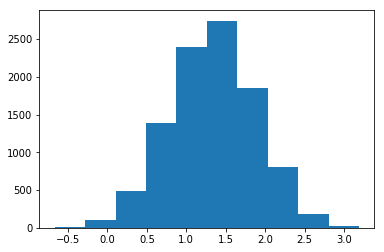

In [20]:
means_drinkers = []
means_nodrinkers = []
diff = []
for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    bootsample_drinkers = bootsample[bootsample['drinks_coffee']==True]
    bootsample_nodrinkers = bootsample[bootsample['drinks_coffee']==False]
    means_drinkers.append(bootsample_drinkers.height.mean())
    means_nodrinkers.append(bootsample_nodrinkers.height.mean())
    diff.append(bootsample_drinkers.height.mean() - bootsample_nodrinkers.height.mean())
plt.hist(diff)

In [21]:
np.std(means_nodrinkers)

0.46566289098726166

In [22]:
np.std(means_drinkers)

0.2810715662259628

In [23]:
np.std(diff)

0.5438584707754605

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

(array([  19.,  141.,  724., 1831., 2756., 2586., 1421.,  442.,   68.,
          12.]),
 array([68.03930842, 68.44669975, 68.85409107, 69.26148239, 69.66887372,
        70.07626504, 70.48365636, 70.89104768, 71.29843901, 71.70583033,
        72.11322165]),
 <a list of 10 Patch objects>)

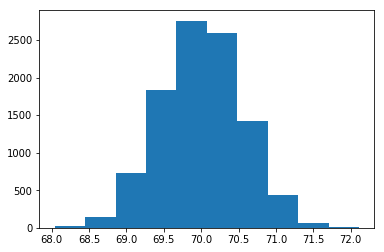

In [14]:
null_vals = np.random.normal(70, np.std(diff), 10000)
plt.hist(null_vals)

In [24]:
sample_mean = sample_df.height.mean()
sample_mean

67.57907352931666

H0: mi <= 70

H1: mi > 70

In [25]:
(null_vals > sample_mean).mean()

1.0

* Large p-value suggest that we shouldn't move away from the null hypothesis

H0: mi >= 70

H1: mi < 70

In [26]:
(null_vals < sample_mean).mean()

0.0

* Low p-value suggest that we reject the null hypothesis in favor of an alternative
* Now we would look at the values that are more extreme

In [28]:
null_mean = float(70)
(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()

0.0

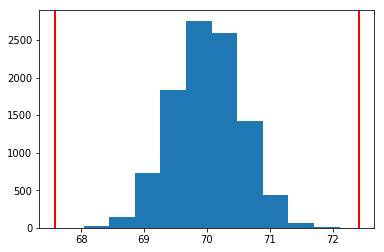

In [29]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=high, color='r', linewidth=2)

### Calculating Errors

Here are two datasets that represent two of the examples you have seen in this lesson.  

One dataset is based on the parachute example, and the second is based on the judicial example.  Neither of these datasets are based on real people.

Use the questions below to assist in answering the quiz questions at the bottom of this page.

In [1]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [2]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.  

**Hint for quiz:** an error is any time the prediction doesn't match an actual value.  Additionally, there are Type I and Type II errors to think about.  We also know we can minimize one type of error by maximizing the other type of error.  If we predict all individuals as innocent, how many of the guilty are incorrectly labeled?  Similarly, if we predict all individuals as guilty, how many of the innocent are incorrectly labeled?

In [5]:
# Take number of lines that are different and divide by the total
jud_total_lines = jud_data.shape[0]
jud_diff_lines = jud_data[jud_data['actual'] != jud_data['predicted']].shape[0]
jud_proportion_error = jud_diff_lines/jud_total_lines
jud_proportion_error

0.042152958945489497

In [10]:
# See the possible options
jud_data.actual.unique()

array(['innocent', 'guilty'], dtype=object)

In [16]:
# Calculate the jud false positives (mi) - type 1 error
jud_innocent_wrong = jud_data[(jud_data['actual']=='innocent') & (jud_data['predicted']=='guilty')].shape[0]
jud_innocent_error = jud_innocent_wrong/jud_total_lines
jud_innocent_error

0.001510366607167376

In [17]:
# Calculate the jud false negatives (beta) - type 2 error
jud_guilty_wrong = jud_data[(jud_data['actual']=='guilty') & (jud_data['predicted']=='innocent')].shape[0]
jud_guilty_error = jud_guilty_wrong/jud_total_lines
jud_guilty_error

0.04064259233832212

In [18]:
#If everyone was predicted as guilty, then every actual innocent 
#person would be a type I error.
# Type I = pred guilty, but actual = innocent
# A proporcao de erros do tipo I, se todos foram considerados culpados na previsao.

jud_data[jud_data['actual'] == 'innocent'].shape[0]/jud_data.shape[0]

0.45159961554304545

In [19]:
#If everyone has prediction of guilty, then no one is predicted inncoent
#Therefore, there would be no type 2 errors in this case
# Type II errs = pred innocent, but actual = guilty
# A proporcao de erros do tipo II, se todos foram considerados culpados na previsao.
0

0

`2.` Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

These should be very similar operations to those you performed in the previous question.

In [8]:
par_total_lines = par_data.shape[0]
par_diff_lines = par_data[par_data['actual'] != par_data['predicted']].shape[0]
par_proportion_error = par_diff_lines/par_total_lines
par_proportion_error

0.039972551037913875

In [20]:
# See the possible options
par_data['actual'].unique()

array(['opens', 'fails'], dtype=object)

In [26]:
# Calculate the jud false positives (mi) - type 1 error
par_fails_wrong = par_data[(par_data['actual']=='fails') & (par_data['predicted']=='opens')].shape[0]
par_fails_error = par_fails_wrong/par_total_lines
par_fails_error

0.00017155601303825698

In [23]:
# Calculate the jud false negatives (beta) - type 2 error
par_opens_wrong = par_data[(par_data['actual']=='opens') & (par_data['predicted']=='fails')].shape[0]
par_opens_error = par_opens_wrong/par_total_lines
par_opens_error

0.03980099502487562

In [29]:
#If every parachute was predicted to fail, what is the proportion
# of type I errors made?

# Type I = pred open, but actual = fail
# In the above situation since we have none predicted to open,
# we have no type I errors
# A proporcao de erros do tipo I, se a previsao de não abrir foi feita para todos os paraquedas
0

0

In [32]:
#If every parachute was predicted to not open, 
#the proportion of Type II Errors made.  

# This would just be the total of actual opens in the dataset, 
# as we would label these all as not open, but actually they open

# Type II = pred no open, but actual = open
par_data[par_data['actual'] == 'opens'].shape[0]/par_data.shape[0]

0.9917653113741637